In [1]:
!ls Data

mote-location-data.txt sonoma-data-all.csv    sonoma-data-net.csv
read-me                sonoma-data-log.csv    sonoma-dates


In [2]:
import pandas as pd

In [15]:
data1 = pd.read_csv('Data/sonoma-data-all.csv')
print(len(data1))
data1.head()

416036


,result_time,epoch,nodeid,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,hamabot
0,2004-05-07 18:24:58.666424,2812,119,5,220.0,2,95.3567,12.6678,92.1444,4218.18,0.0
1,2004-05-07 18:24:58.805974,2812,105,129,223.0,3,96.9957,12.6482,93.7072,9363.23,0.0
2,2004-05-07 18:24:59.075427,2812,113,118,222.0,4,94.5031,12.4522,91.2718,9405.41,0.0
3,2004-05-07 18:24:59.355354,2812,138,5,223.0,2,96.8828,12.6580,93.6018,9363.23,0.0
4,2004-05-07 18:24:59.675467,2812,127,42,222.0,3,97.8044,12.3836,94.4090,4702.70,0.0


# Part 2 Data Cleaning

- sonoma_net: Data extracted from network (Cloud?)
- sonoma_log: Data extracted from onboard memory 

In [6]:
sonoma_log = pd.read_csv('Data/sonoma-data-log.csv')
sonoma_net = pd.read_csv('Data/sonoma-data-net.csv')

In [13]:
print(len(sonoma_net))
sonoma_net.head()

114980


,result_time,epoch,nodeid,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,hamabot
0,2004-05-07 18:24:58.666424,2812,119,5,220,2,95.3567,12.6678,92.1444,4218.18,0.0
1,2004-05-07 18:24:58.805974,2812,105,129,223,3,96.9957,12.6482,93.7072,9363.23,0.0
2,2004-05-07 18:24:59.075427,2812,113,118,222,4,94.5031,12.4522,91.2718,9405.41,0.0
3,2004-05-07 18:24:59.355354,2812,138,5,223,2,96.8828,12.6580,93.6018,9363.23,0.0
4,2004-05-07 18:24:59.675467,2812,127,42,222,3,97.8044,12.3836,94.4090,4702.70,0.0


In [14]:
print(len(sonoma_log))
sonoma_log.head()

301056


,result_time,epoch,nodeid,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,hamabot
0,2004-11-10 14:25:00,3,2,65535,2.88311,255,43.8183,22.4090,43.5236,0.0,0.0
1,2004-11-10 14:25:00,4,2,65535,2.88311,255,44.7798,22.2032,44.4552,0.0,0.0
2,2004-11-10 14:25:00,5,2,65535,2.88311,255,45.7695,22.0660,45.4219,0.0,0.0
3,2004-11-10 14:25:00,6,2,65535,2.88311,255,46.3609,22.0072,46.0020,0.0,0.0
4,2004-11-10 14:25:00,7,2,65535,2.88311,255,46.0326,21.9680,45.6714,0.0,0.0


In [9]:
sonoma_log.columns

Index(['result_time', ' epoch', ' nodeid', ' parent', ' voltage', ' depth',
       ' humidity', ' humid_temp', ' humid_adj', ' hamatop', ' hamabot'],
      dtype='object')

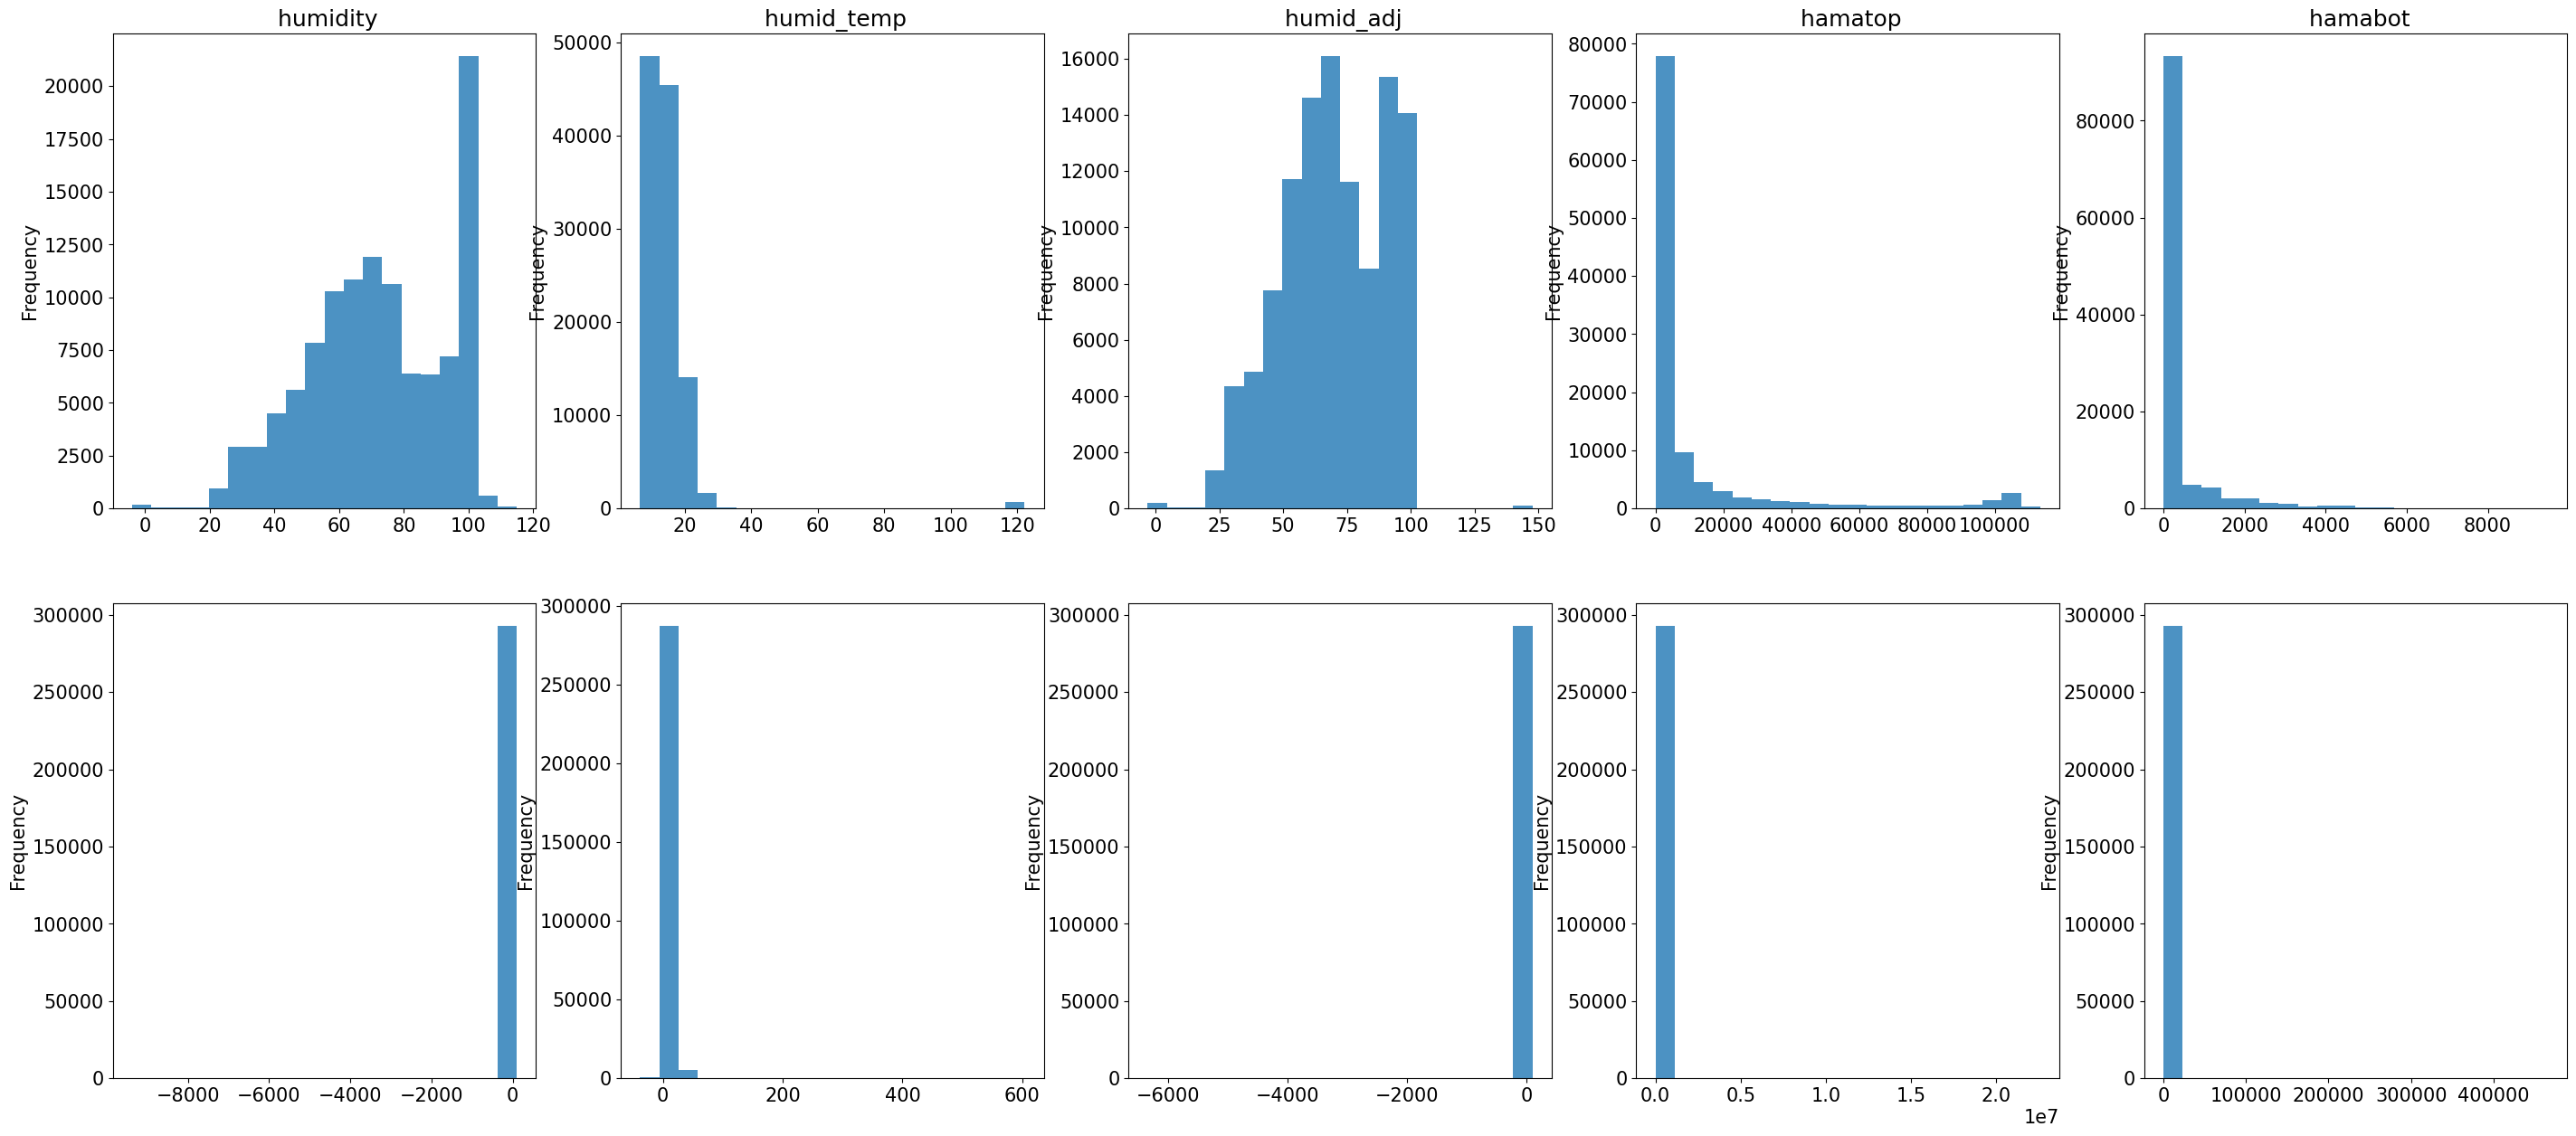

In [28]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
%matplotlib inline

variable_list = [' humidity',
                 ' humid_temp', ' humid_adj', ' hamatop', ' hamabot']

fig, ax = plt.subplots(2,5, figsize=(35,15))
for i,var in enumerate(variable_list):
    
    sonoma_net[var].plot.hist(ax=ax[0,i], alpha=0.8, color='tab:blue',bins=20)
    sonoma_log[var].plot.hist(ax=ax[1,i], alpha=0.8, color='tab:blue',bins=20)
    ax[0,i].set_title(var)
    

- Looking at raw histogram, we see significant differences in ranges for:
- humidity
- humid_tmep
- humid_adj

In [31]:
sonoma_net[variable_list].describe()

,humidity,humid_temp,humid_adj,hamatop,hamabot
count,110718.000000,110718.000000,110718.000000,110718.000000,110718.000000
mean,72.123596,14.276954,69.789309,11521.654151,271.948958
std,21.327203,9.840161,20.080055,24962.815555,805.305179
min,-4.000000,6.582000,-3.028470,0.000000,0.000000
25%,57.098400,10.119800,55.786300,0.000000,0.000000
50%,72.054300,12.981400,69.770650,0.000000,0.000000
75%,92.607600,16.088000,89.049550,8436.360000,0.000000
max,114.894000,122.153000,147.693000,113376.000000,9480.770000


In [32]:
sonoma_log[variable_list].describe()

,humidity,humid_temp,humid_adj,hamatop,hamabot
count,292786.000000,292786.000000,292786.000000,2.927860e+05,292786.000000
mean,61.414470,15.022345,59.546536,1.087034e+04,245.535843
std,31.069201,5.685116,27.265114,4.842214e+04,1180.337889
min,-9375.370000,-38.400000,-6334.830000,0.000000e+00,0.000000
25%,40.026800,10.864600,39.529500,0.000000e+00,0.000000
50%,61.582900,14.716000,59.998400,0.000000e+00,0.000000
75%,80.199700,18.812400,77.221400,6.762330e+03,0.000000
max,104.405000,603.843000,100.223000,2.259220e+07,465820.000000


- Comparing the actual statistics, we can see that the quantiles between both sets are very similar.
- Thus the difference in ranges could be due to outliers in the dataset. 
- These outliers see to be in sonoma_log which generally has more extreme values compared to sonoma_net

We find these outliers by subsetting sonoma_log based on minimums/maximums observed in sonoma_net

In [48]:
outlier_points = sonoma_log[(sonoma_log[' humidity']< -4) | (sonoma_log[' humid_temp'] > 122)]
sonoma_log_no_outlier = sonoma_log.drop(outlier_points.index)

Redoing Histograms:

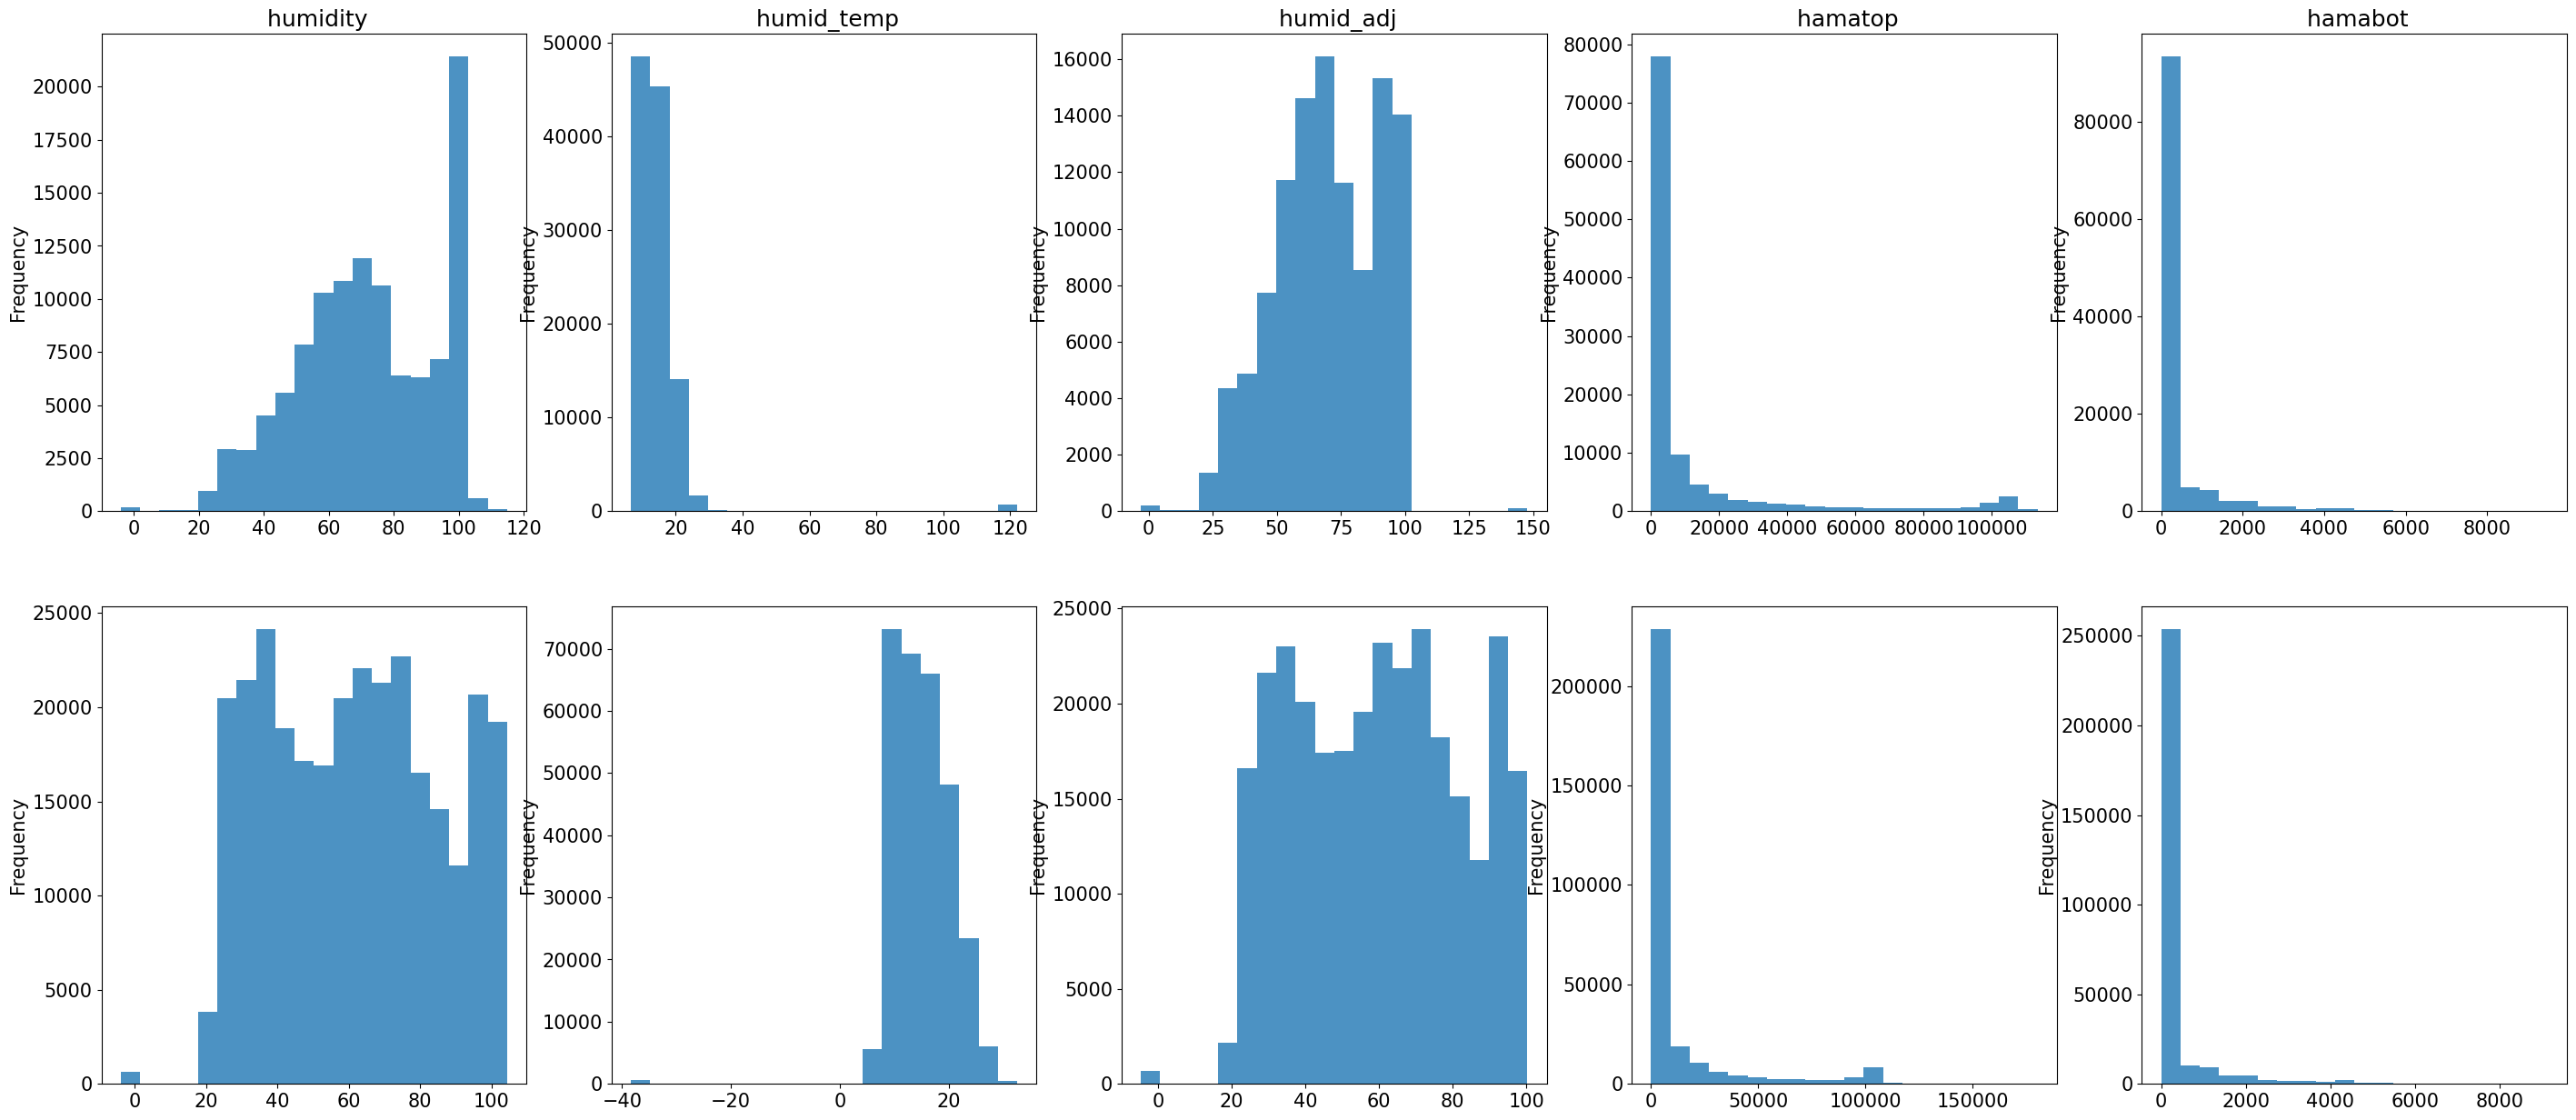

In [49]:
fig, ax = plt.subplots(2,5, figsize=(35,15))
for i,var in enumerate(variable_list):
    
    sonoma_net[var].plot.hist(ax=ax[0,i], alpha=0.8, color='tab:blue',bins=20)
    sonoma_log_no_outlier[var].plot.hist(ax=ax[1,i], alpha=0.8, color='tab:blue',bins=20)
    ax[0,i].set_title(var)

We see that things looks much more similar.

# Check Missing Data

In [64]:
import numpy as np
missing_data_net = sonoma_net[np.any(sonoma_net.isna(),1)]
print("No Missing Data from network data: ",len(missing_data_net))

miss_data_log = sonoma_log_no_outlier[np.any(sonoma_log_no_outlier.isna(),1)]
print("No Missing Data from log data: ",len(miss_data_log))

# Remove
sonoma_net_no_miss = sonoma_net[~np.any(sonoma_net.isna(),1)]
sonoma_log_no_miss = sonoma_log_no_outlier[~np.any(sonoma_log_no_outlier.isna(),1)]

print('\nNo. Network Data Full: ', len(sonoma_net_no_miss))
print("No. Log Data Full + no outliers: ", len(sonoma_log_no_miss))

No Missing Data from network data:  4262
No Missing Data from log data:  8270

No. Network Data Full:  110718
No. Log Data Full + no outliers:  292784


### Combine cleaner net and log data

In [68]:
sonoma_net_no_miss = sonoma_net_no_miss.copy() # To get rid of annoying warning
sonoma_log_no_miss = sonoma_log_no_miss.copy()

sonoma_net_no_miss.loc[:,'source'] = 'net'
sonoma_log_no_miss.loc[:,'source'] = 'log'

sonoma_all = pd.concat([sonoma_net_no_miss,sonoma_log_no_miss])

In [71]:
sonoma_all.sample(10).head()

,result_time,epoch,nodeid,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,hamabot,source
6261,2004-11-10 14:25:00,2938,4,197,2.627960,2,99.8161,10.4040,95.7817,0.00,0.0,log
214338,2004-11-10 14:25:00,879,123,110,2.651430,4,79.2189,11.1880,76.3405,2589.29,0.0,log
60883,2004-05-21 13:56:27.035636,6790,118,110,225.000000,4,99.5535,9.3652,95.2470,1031.11,0.0,net
243521,2004-11-10 14:25:00,1272,134,119,0.580567,8,25.0177,20.6352,24.7101,0.00,0.0,log
43639,2004-11-10 14:25:00,3560,22,77,2.582260,3,92.4658,8.1108,88.2340,0.00,0.0,log


## Part c) Adding Location data

Loading 

In [82]:
# Loads the information
mote_location = pd.read_csv('Data/mote-location-data.txt',sep='\t',skiprows=1,header=None)

# Loads the headers
mote_location_head = pd.read_csv('Data/mote-location-data.txt',sep='\t',header=0).columns

# Clean the headers
col_names_mote_location = [x for x in mote_location_head[0].split(' ') if x!='']

# Set the column names
mote_location.columns = col_names_mote_location
mote_location.head()

,ID,Height,Direc,Dist,Tree
0,24,10.5,WSW,0.1,edge
1,20,12.7,WSW,0.1,edge
2,27,14.9,WSW,0.1,edge
3,38,16.6,WSW,0.1,edge
4,0,16.9,NW,0.1,edge


In [83]:
print('Size mote-location table: ', len(mote_location))

Size mote-location table:  80


Checking if mote location is clean - ID should be a unique variable


In [84]:
np.all(mote_location['ID'].value_counts() == 1)

True

Merge tables together this is a left (main table) join  to the mote locations

In [88]:
sonoma_all = sonoma_all.merge(mote_location,
                how='left',
                left_on=' nodeid',
                right_on='ID')

## Part d) Redo Histograms and remove outliers

In [89]:
sonoma_all.columns

Index(['result_time', ' epoch', ' nodeid', ' parent', ' voltage', ' depth',
       ' humidity', ' humid_temp', ' humid_adj', ' hamatop', ' hamabot',
       'source', 'ID', 'Height', 'Direc', 'Dist', 'Tree'],
      dtype='object')

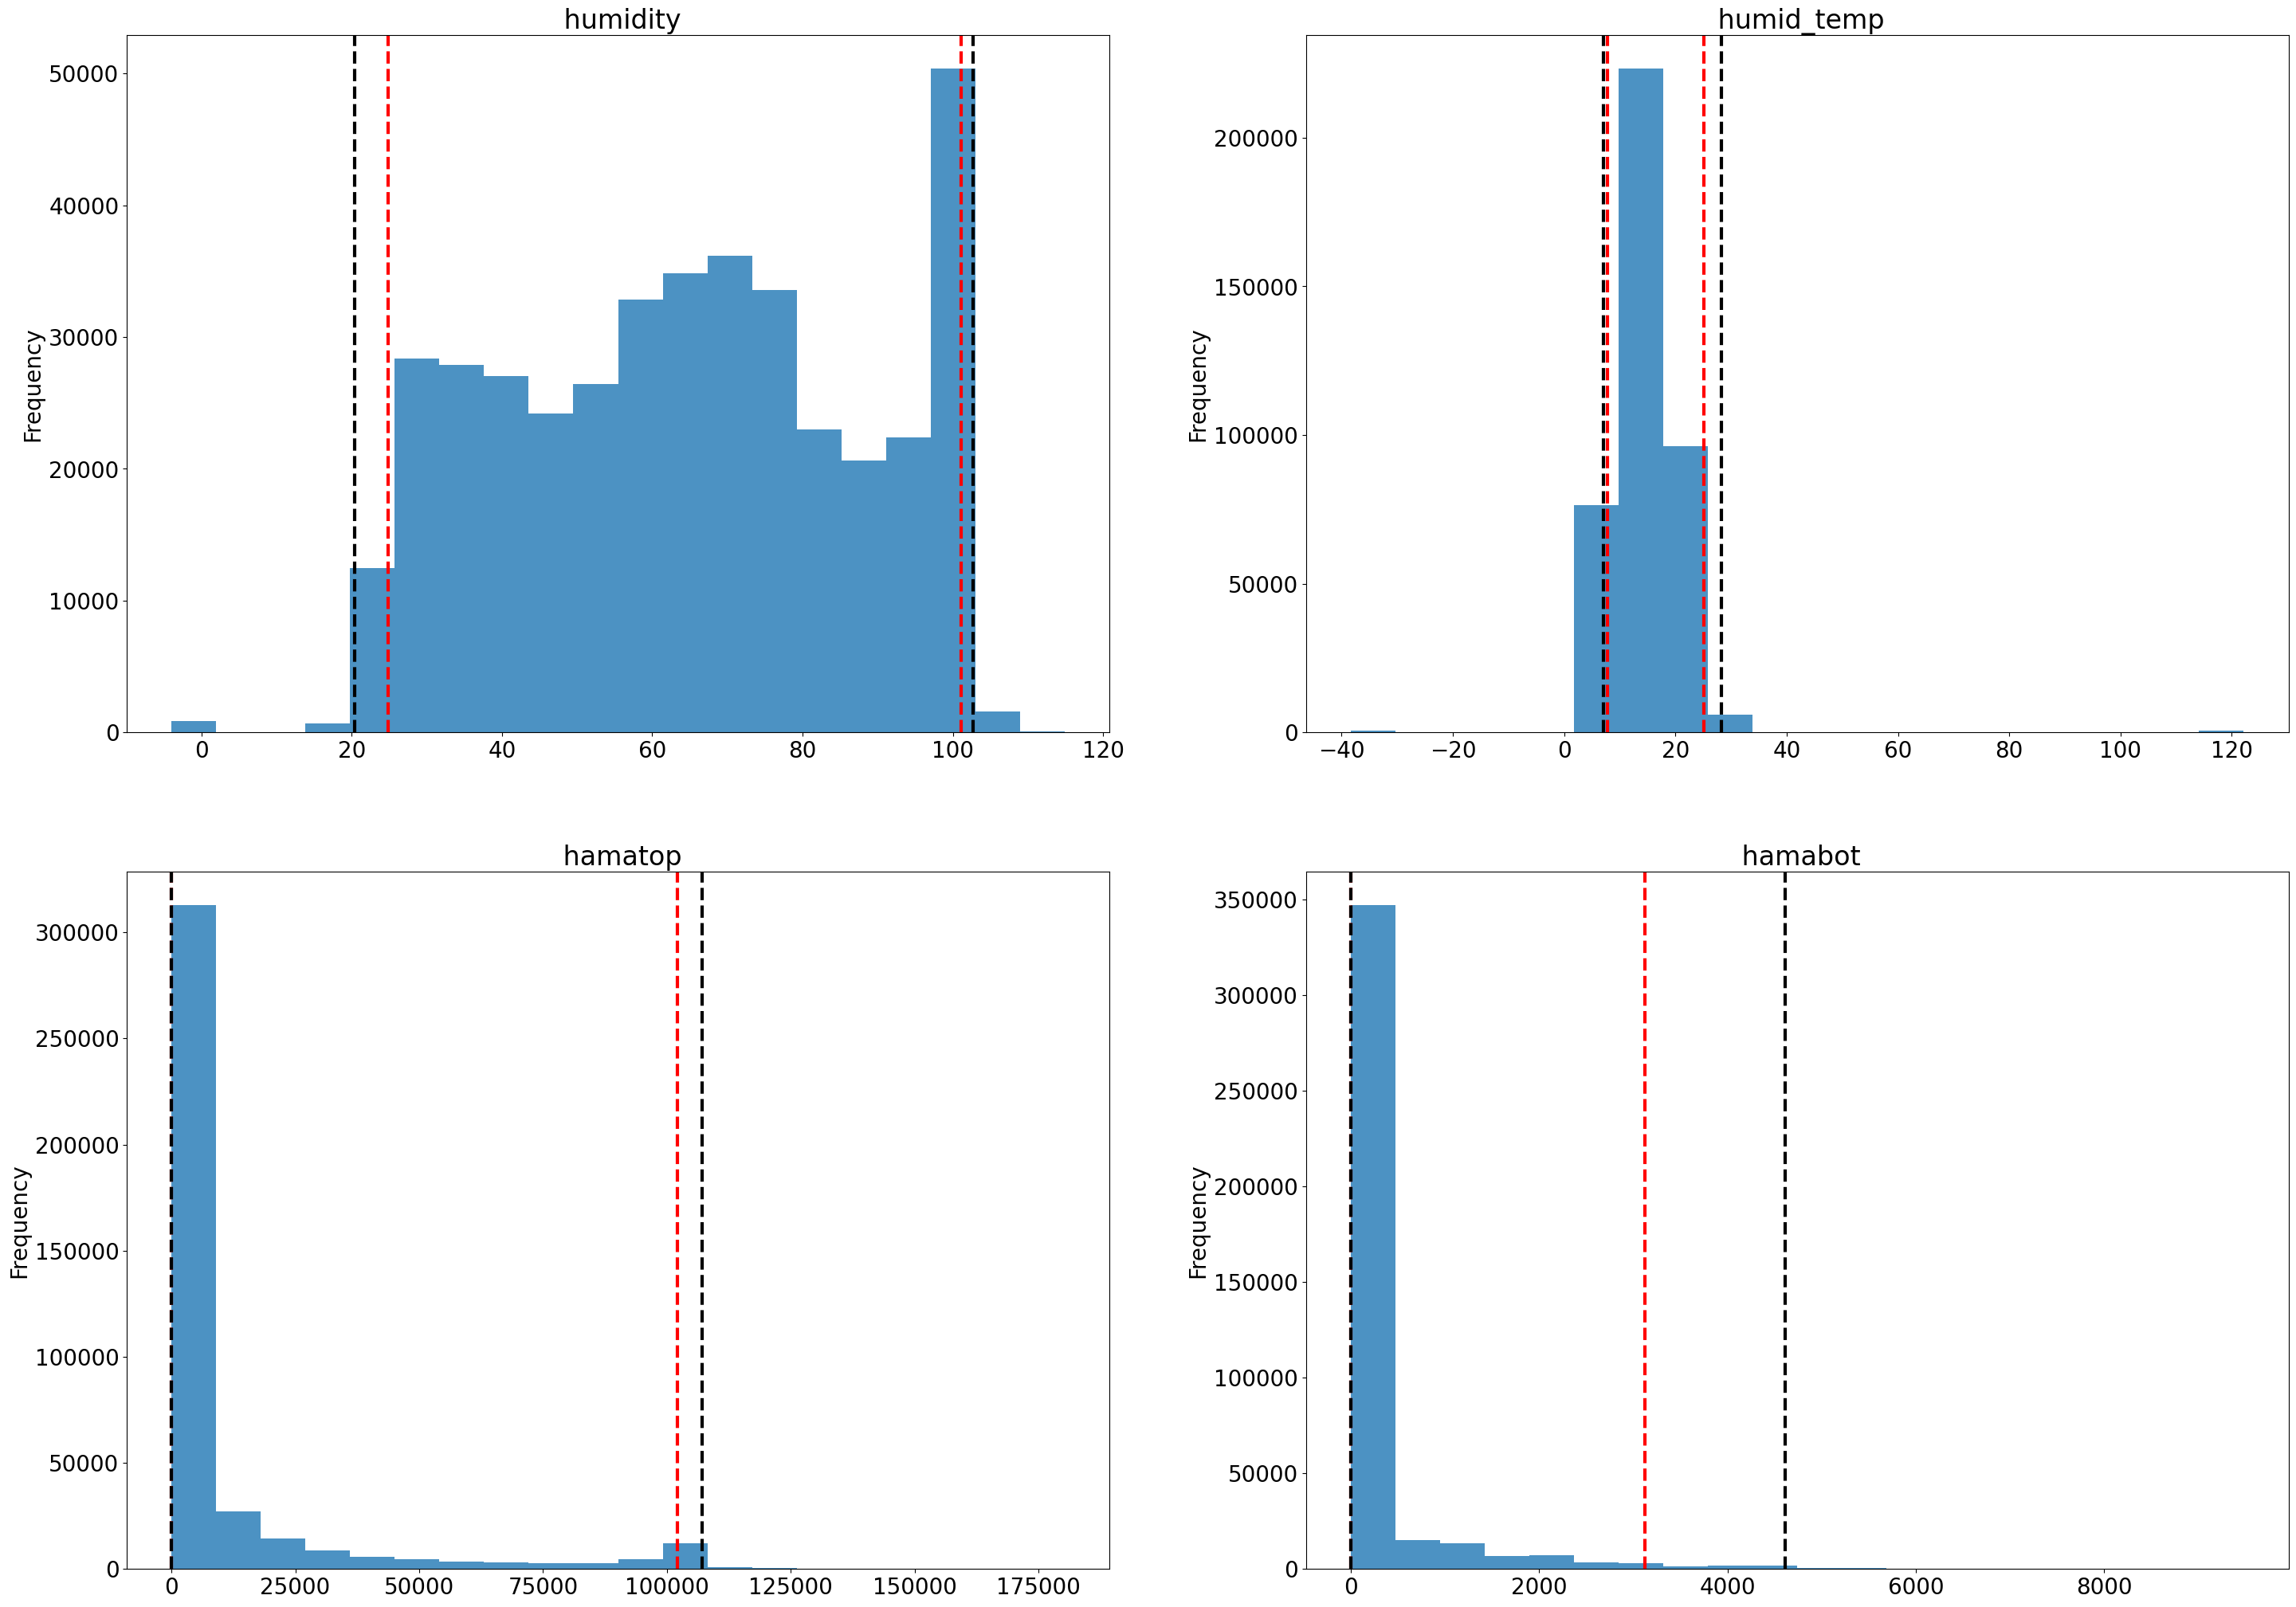

In [115]:
plt.rcParams.update({'font.size': 20})

var_list = [' humidity', ' humid_temp', ' hamatop', ' hamabot']
plot_locs = [(0,0),(0,1),(1,0),(1,1)]
fig, ax = plt.subplots(2,2, figsize=(35,25))

# Choose Percentile values
percentiles = [(5,95), (25,75)]

for i,var in enumerate(var_list):
    
    sonoma_all[var].plot.hist(ax=ax[plot_locs[i][0],
                                    plot_locs[i][1]], alpha=0.8,
                              color='tab:blue',bins=20)

    ax[plot_locs[i][0],plot_locs[i][1]].set_title(var)
    
    # Get data percentiles 2.5-97.5 and 25-75
    c2_5,c97_5 = np.percentile(sonoma_all[var].values, q=2.5),np.percentile(sonoma_all[var].values, q=97.5)
    c01,c995 = np.percentile(sonoma_all[var].values, q=0.5),np.percentile(sonoma_all[var].values, q=99.5)
    
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c2_5, color='red',linestyle='--',alpha=1,linewidth=3)
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c97_5, color='red',linestyle='--',alpha=1,linewidth=3)
    
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c01, color='k',linestyle='--',alpha=1,linewidth=3)
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c995, color='k',linestyle='--',alpha=1,linewidth=3)

plt.show()

- It is clear that there are outliers for hamatop and hamabot
- Humidity has values that are negative which might not be possible as well (not sure)

Removing them we have:


In [155]:
# Hamatop/bot outliers
print('No hamatop outliers: ', len(sonoma_all[sonoma_all[' hamatop']>110000]))
print('No hamabot outliers: ', len(sonoma_all[sonoma_all[' hamabot']>6000]))
# Humidity outliers
print('No humidity outliers: ', len(sonoma_all[sonoma_all[' humidity']<5]))

print('No combined outliers: ', len(sonoma_all[(sonoma_all[' hamatop']>120000) | \
                                               (sonoma_all[' hamabot']>6000) | \
                                               (sonoma_all[' humidity']<5)]))

sonoma_all_no_outliers = sonoma_all[~((sonoma_all[' hamatop']>120000) |\
                                      (sonoma_all[' hamabot']>6000) |\
                                     (sonoma_all[' humidity']<5))]

No hamatop outliers:  512
No hamabot outliers:  326
No humidity outliers:  872
No combined outliers:  1257


### Plotting Again

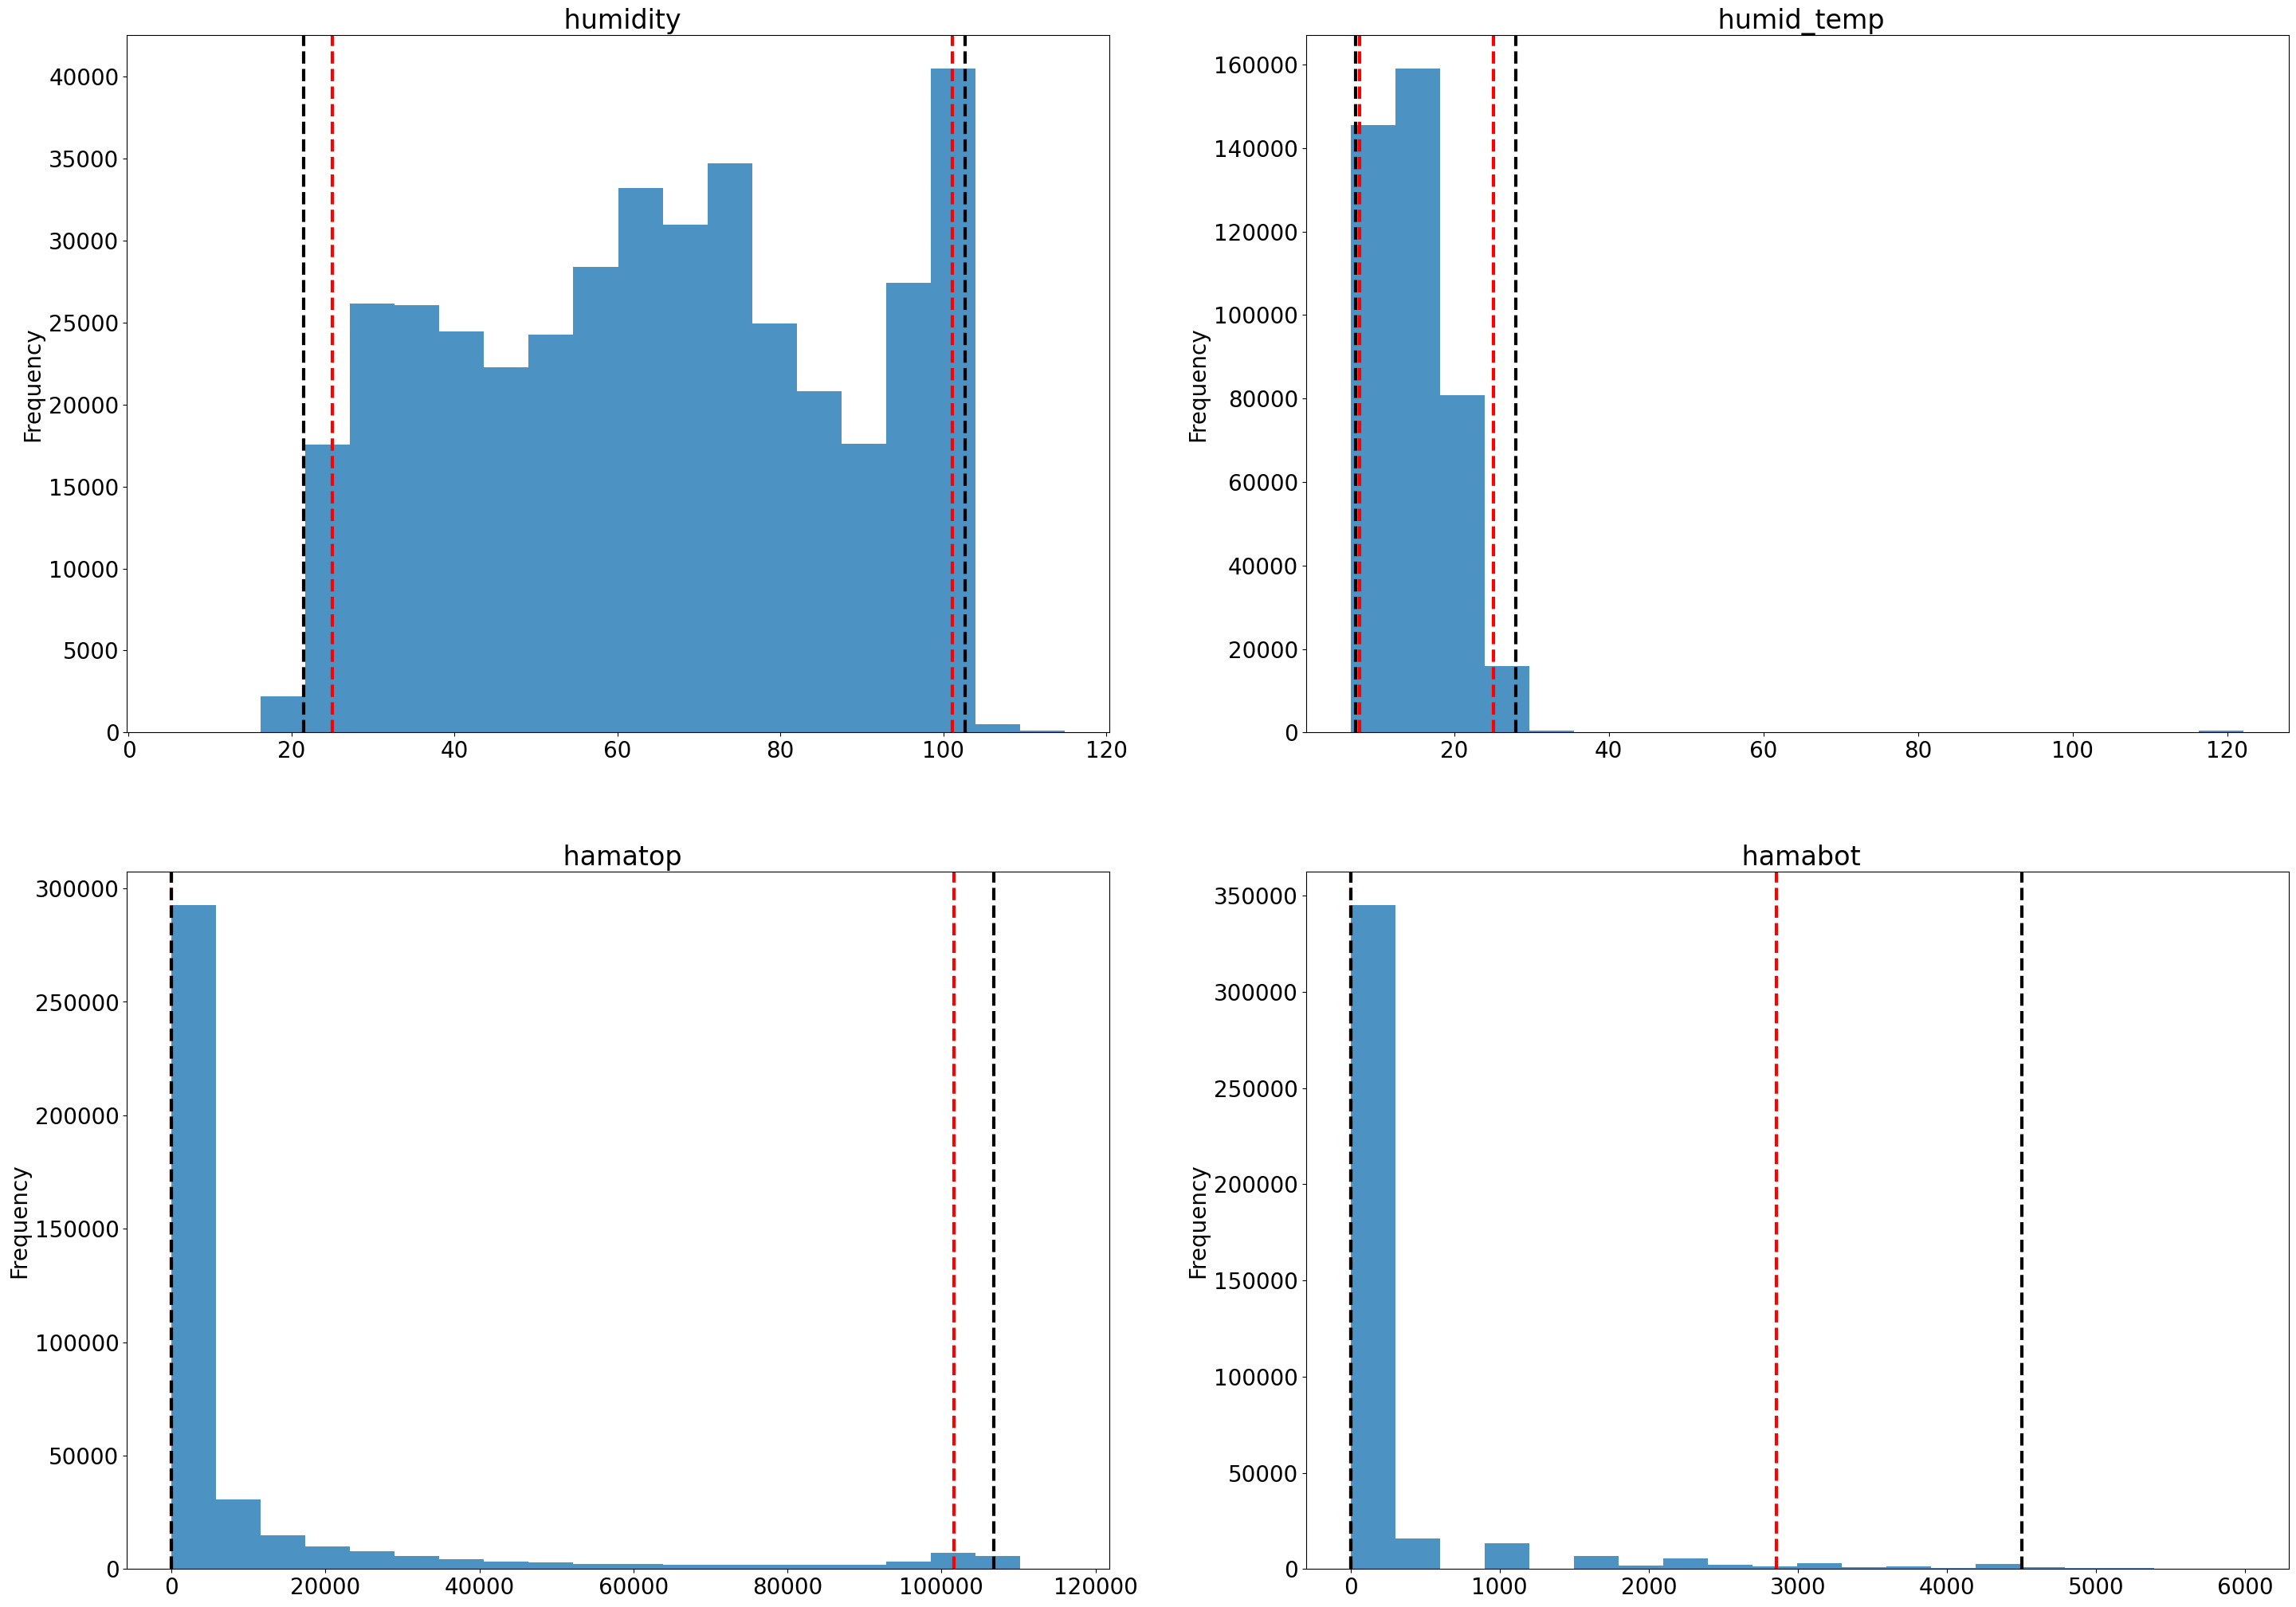

In [157]:
fig, ax = plt.subplots(2,2, figsize=(35,25))

for i,var in enumerate(var_list):
    
    sonoma_all_no_outliers[var].plot.hist(ax=ax[plot_locs[i][0],
                                    plot_locs[i][1]], alpha=0.8,
                              color='tab:blue',bins=20)

    ax[plot_locs[i][0],plot_locs[i][1]].set_title(var)
    
    # Get data percentiles 2.5-97.5 and 25-75
    c2_5,c97_5 = np.percentile(sonoma_all_no_outliers[var].values, q=2.5),np.percentile(sonoma_all_no_outliers[var].values, q=97.5)
    c01,c995 = np.percentile(sonoma_all_no_outliers[var].values, q=0.5),np.percentile(sonoma_all_no_outliers[var].values, q=99.5)
    
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c2_5, color='red',linestyle='--',alpha=1,linewidth=3)
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c97_5, color='red',linestyle='--',alpha=1,linewidth=3)
    
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c01, color='k',linestyle='--',alpha=1,linewidth=3)
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c995, color='k',linestyle='--',alpha=1,linewidth=3)

plt.show()

## Part e)

- There are still some extreme values for hamatop and hamabot as well as humid_temp. However they are not obviously errorneous, so we cannot tell if they are part of the distribution.

- Due to the sensitivity of the instrument, these points might be generated by miscalibration or equipment failure, and thus will not represent the data generated by the environment around the tree. This means that they will not be useful for analysis